# INM701 Coursework
## Imtiaz Ali 200022830

The goal is to use regression to predict if a UFC fighter wins more often based on features such height to weight ratio, Significant strikes landed and absorbed, takedowns attempted and defended and also submission attempts.

4100+ records, with 18 features.


### Printing the Dataset

In [35]:
import os
import pandas as pd
import numpy as np

path = "."
filename_read = ("ufcfightstats.csv")
df = pd.read_csv(filename_read, na_values=['NA', '?'])

df = df.reindex(np.random.permutation(df.index))
df.reset_index(inplace=True, drop=True)
df

,name,nickname,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,date_of_birth,sig_strikes_landed_min,sig_strike_acc,sig_strikes_absorbed_min,sig_strike_def,avg_takedowns_landed_per_15_min,takedown_acc,takedown_def,avg_sub_attempted_15_min
0,Tom Tuggle,The Law,0,3,0,187.96,113.40,NaN,Orthodox,NaN,0.00,0,2.14,0,32.14,100,0,0.00
1,Theo Rlayang,Jungle King,5,1,0,170.18,65.77,165.10,Orthodox,10/08/1994,5.93,48,8.40,40,2.00,40,0,5.93
2,Frank Shamrock,NaN,23,10,2,177.80,83.91,NaN,Orthodox,08/12/1972,4.75,53,4.66,57,0.35,50,37,4.75
3,Jason Brilz,Hitman,22,6,1,180.34,92.99,180.34,Orthodox,07/07/1975,2.66,40,1.78,65,2.37,25,25,2.66
4,Glaico Franca Moreira,Nego,15,5,0,182.88,70.31,195.58,Orthodox,28/02/1991,2.35,42,3.46,47,2.68,42,76,2.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4104,Waldo Cortes-Acosta,Salsa Boy,10,1,0,193.04,117.93,198.12,Orthodox,03/10/1991,6.97,50,4.06,52,0.00,0,60,6.97
4105,Brandon Sayles,Man of War,5,1,0,195.58,120.20,NaN,NaN,NaN,0.00,0,0.00,0,0.00,0,0,0.00
4106,Elizabeth Phillips,NaN,6,6,0,167.64,61.23,165.10,Orthodox,20/08/1986,2.60,33,3.07,58,0.75,25,53,2.60
4107,Dave Galera,Scarecrow,5,1,0,180.34,61.23,NaN,Orthodox,12/01/1978,1.67,69,0.53,33,0.00,0,14,1.67


### Splitting the data into Training, Validation and Testing

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your dataset
filename_read = ("ufcfightstats.csv")
df = pd.read_csv(filename_read, na_values=['NA', '?'])
df = df.dropna()

print(df[:5])

# Assuming 'label_column' is the name of the column containing your target variable (labels)
X = df.drop('wins', axis=1)  # Features
y = df['wins']  # Labels

# Perform the split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the shapes of the resulting sets to verify the split
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")



                    name                  nickname  wins  losses  draws  \
2     Cortavious Romious  Are You Not Entertained?     7       2      0   
3            Danny Silva                   El Puma     8       1      0   
5  Charalampos Grigoriou                 Ferocious     8       3      0   
7     Ernesta Kareckaite              Heavy-Handed     5       0      1   
8           Danny Barlow              LeftHand2God     7       0      0   

   height_cm  weight_in_kg  reach_in_cm    stance date_of_birth  \
2     162.56         61.23       172.72  Southpaw    06/01/1994   
3     180.34         65.77       177.80    Switch    30/01/1997   
5     170.18         61.23       170.18  Orthodox    31/03/1992   
7     175.26         56.70       180.34  Orthodox    05/07/1998   
8     187.96         77.11       200.66  Southpaw    02/08/1995   

   sig_strikes_landed_min  sig_strike_acc  sig_strikes_absorbed_min  \
2                   14.48              31                     20.69   
3   

In [32]:
import os
import pandas as pd

path = "."
filename_read = ("ufcfightstats.csv")
df = pd.read_csv(filename_read, na_values=['NA', '?'])

df = df.select_dtypes(include=['int', 'float'])

headers = list(df.columns.values)
fields = []

for field in headers:
    fields.append({
        'name' : field,
        'mean' : df[field].mean(),
        'var' : df[field].var(),
        'sdev' : df[field].std(),
    })
for field in fields:
    print(field)
    

{'name': 'wins', 'mean': 12.360671696276466, 'var': 87.90980636468277, 'sdev': 9.376022950306956}
{'name': 'losses', 'mean': 5.722073497201266, 'var': 26.056623158179814, 'sdev': 5.104568851350701}
{'name': 'draws', 'mean': 0.2642978826965198, 'var': 0.6764782130943268, 'sdev': 0.8224829561117524}
{'name': 'height_cm', 'mean': 178.23443861490034, 'var': 79.01810435545387, 'sdev': 8.889212808536753}
{'name': 'weight_in_kg', 'mean': 77.39540527100944, 'var': 323.5821515268348, 'sdev': 17.988389353325516}
{'name': 'reach_in_cm', 'mean': 181.8037288135593, 'var': 114.06219122248105, 'sdev': 10.679990225767112}
{'name': 'sig_strikes_landed_min', 'mean': 2.4421002677050376, 'var': 3.9863567124366543, 'sdev': 1.9965862647120094}
{'name': 'sig_strike_acc', 'mean': 35.55390605986858, 'var': 416.3674074507522, 'sdev': 20.405082882721945}
{'name': 'sig_strikes_absorbed_min', 'mean': 3.1468775857872964, 'var': 8.122973281262047, 'sdev': 2.8500830305908713}
{'name': 'sig_strike_def', 'mean': 42.666

In [8]:
import os
import pandas as pd
import numpy as np

path = "."

filename_read = os.path.join(path, "ufcfightstats.csv")
df = pd.read_csv(filename_read, na_values=['NA', '?'])


# Get a list of all numeric columns in the DataFrame
numeric_columns = df.select_dtypes(include=['number']).columns

# Apply median imputation to all numeric columns
df[numeric_columns] = df[numeric_columns].apply(lambda x: x.fillna(x.median()))

# Check the exact column names
print("All columns:", df.columns)

columns_to_drop = ['name', 'nickname','date_of_birth']

# Drop columns if they exist
for column_to_drop in columns_to_drop:
    if column_to_drop in df.columns:
        df.drop(column_to_drop, axis=1, inplace=True)
    else:
        print(f"Column '{column_to_drop}' not found in DataFrame.")
print(f"After dropping {df.columns}")
    
df = df.reindex(np.random.permutation(df.index))
df.reset_index(inplace=True, drop=True)
df

All columns: Index(['name', 'nickname', 'wins', 'losses', 'draws', 'height_cm',
       'weight_in_kg', 'reach_in_cm', 'stance', 'date_of_birth',
       'sig_strikes_landed_min', 'sig_strike_acc', 'sig_strikes_absorbed_min',
       'sig_strike_def', 'avg_takedowns_landed_15_min', 'takedown_acc',
       'takedown_def', 'avg_sub_attempt_15_min'],
      dtype='object')
After dropping Index(['wins', 'losses', 'draws', 'height_cm', 'weight_in_kg', 'reach_in_cm',
       'stance', 'sig_strikes_landed_min', 'sig_strike_acc',
       'sig_strikes_absorbed_min', 'sig_strike_def',
       'avg_takedowns_landed_15_min', 'takedown_acc', 'takedown_def',
       'avg_sub_attempt_15_min'],
      dtype='object')


,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,sig_strikes_landed_min,sig_strike_acc,sig_strikes_absorbed_min,sig_strike_def,avg_takedowns_landed_15_min,takedown_acc,takedown_def,avg_sub_attempt_15_min
0,19,11,0,187.96,106.59,182.88,Southpaw,0.98,20,11.80,29,0.00,0,0,0.98
1,11,3,0,180.34,77.11,190.50,Southpaw,4.17,37,4.12,61,2.91,44,0,4.17
2,6,9,0,175.26,65.77,182.88,NaN,2.26,57,2.71,51,0.00,0,66,2.26
3,12,4,0,190.50,120.20,195.58,Southpaw,3.43,45,3.08,44,1.09,24,69,3.43
4,9,1,0,185.42,111.13,190.50,Orthodox,2.33,56,3.25,59,1.73,75,100,2.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4104,7,0,0,160.02,52.16,152.40,Orthodox,3.73,52,1.33,64,2.67,72,100,3.73
4105,9,2,0,180.34,70.31,182.88,NaN,0.00,0,0.00,0,0.00,0,0,0.00
4106,9,3,0,167.64,65.77,172.72,Orthodox,3.21,48,4.54,45,1.18,18,27,3.21
4107,2,3,0,177.80,61.23,182.88,NaN,0.00,0,0.00,0,0.00,0,0,0.00


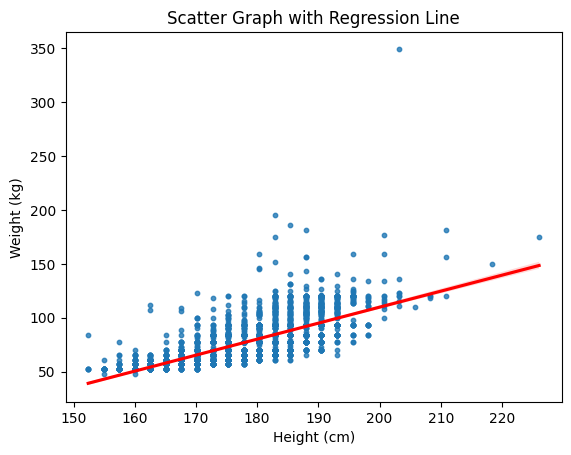

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


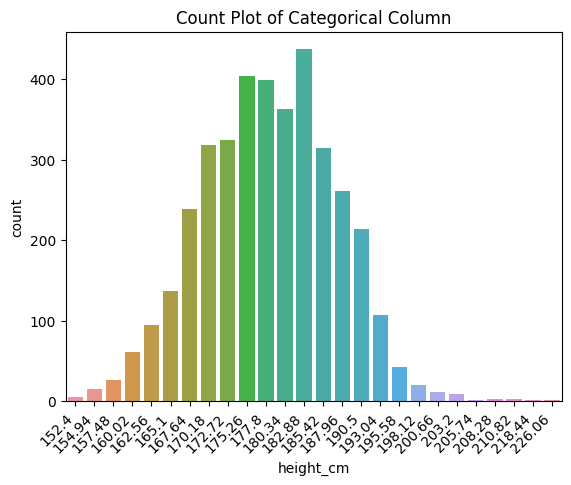

In [26]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

path = "."

filename_read = os.path.join(path, "ufcfightstats.csv")
df = pd.read_csv(filename_read, na_values=['NA', '?'])

sns.regplot(x='height_cm', y='weight_kg', data=df, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Scatter Graph with Regression Line')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

sns.countplot(x='height_cm', data=df)
plt.title('Count Plot of Categorical Column')
plt.xlabel('height_cm')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')  # You can adjust the rotation angle as needed

plt.show()

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


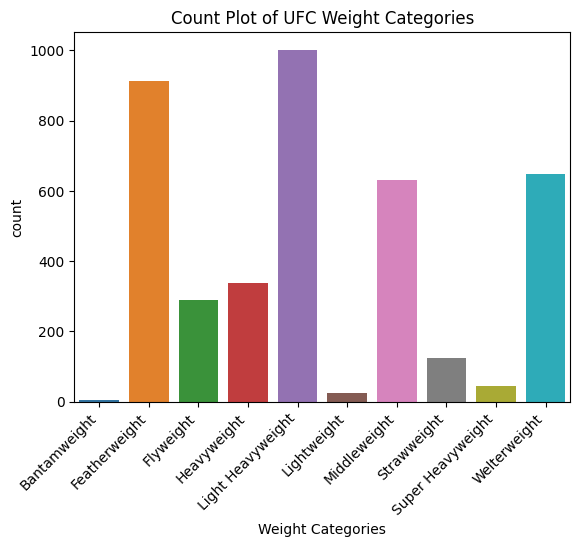

In [37]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

path = "."
filename_read = os.path.join(path, "ufcfightstats.csv")
df = pd.read_csv(filename_read, na_values=['NA', '?'])

# Define UFC weight categories
weight_categories = {
    'Strawweight': (0, 52.5),
    'Flyweight': (52.5, 56.7),
    'Bantamweight': (56.7, 61.2),
    'Featherweight': (61.2, 65.8),
    'Lightweight': (65.8, 70.3),
    'Welterweight': (70.3, 77.1),
    'Middleweight': (77.1, 83.9),
    'Light Heavyweight': (83.9, 102.1),
    'Heavyweight': (102.1, 120.2),
    'Super Heavyweight': (120.2, float('inf'))
}

# Categorize weights based on UFC weight categories
df['weight_category'] = pd.cut(df['weight_kg'], bins=[0] + [upper for (_, upper) in weight_categories.values()], labels=weight_categories.keys())

# Create a count plot
sns.countplot(x='weight_category', data=df, order=sorted(weight_categories.keys()))
plt.title('Count Plot of UFC Weight Categories')
plt.xlabel('Weight Categories')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()
